In [1]:
#@title imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont


Explorative data analysis:

In [4]:
#@title Load datasets
print("loading data...")
df_basics = pd.read_csv('E:/prueba tecnica/movies/title_basics.tsv', sep='\t' ,low_memory=False)
print("1/2 loaded...")
df_ratings = pd.read_csv('E:/prueba tecnica/movies/title_ratings.tsv', sep='\t' ,low_memory=False)
print("ended loading data")


loading data...
1/2 loaded...
ended loading data


In [5]:
#@title Merge the datasets using tconst
df = pd.merge(df_basics, df_ratings, on='tconst', how='inner')
df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,2007
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.8,270
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1920
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.5,178
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2696
...,...,...,...,...,...,...,...,...,...,...,...
1374989,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,Drama,7.6,11
1374990,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Game-Show,Reality-TV",7.0,22
1374991,tt9916778,tvEpisode,Escape,Escape,0,2019,\N,\N,"Crime,Drama,Mystery",7.2,36
1374992,tt9916840,tvEpisode,Horrid Henry's Comic Caper,Horrid Henry's Comic Caper,0,2014,\N,11,"Adventure,Animation,Comedy",8.8,6


In [6]:
#@title leaving only the movies in the last 15 years, erasing nulls and unimportant columns
print("leaving only the last 15 years movies")
df = df[(df['startYear'].str.strip() > "2008") & (df['startYear'].str.strip() != r"\N") & (df['startYear'].str.strip() < "2024")
        & (df['genres'].str.strip() != r"\N") & (df['titleType'].str.strip() == "movie")]
df = df.drop(['endYear'],axis=1)
df = df.drop(['originalTitle'],axis=1)
df

leaving only the last 15 years movies


,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
3592,tt0013274,movie,Istoriya grazhdanskoy voyny,0,2021,94,Documentary,6.8,62
40764,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Drama,6.4,183
46638,tt0069049,movie,The Other Side of the Wind,0,2018,122,Drama,6.7,7888
47983,tt0070596,movie,Socialist Realism,0,2023,78,Drama,7.6,46
58957,tt0083283,movie,Victor Seastrom,0,2021,65,"Biography,Documentary",6.7,67
...,...,...,...,...,...,...,...,...,...
1374961,tt9916270,movie,Il talento del calabrone,0,2020,84,Thriller,5.8,1451
1374965,tt9916362,movie,Coven,0,2020,92,"Drama,History",6.4,5628
1374970,tt9916428,movie,The Secret of China,0,2019,\N,"Adventure,History,War",3.5,17
1374976,tt9916538,movie,Kuambil Lagi Hatiku,0,2019,123,Drama,8.6,7


In [7]:
#@title leaving only one genre to further analysis
df['genres'] = df['genres'].str.split(',').str[0]
df

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
3592,tt0013274,movie,Istoriya grazhdanskoy voyny,0,2021,94,Documentary,6.8,62
40764,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Drama,6.4,183
46638,tt0069049,movie,The Other Side of the Wind,0,2018,122,Drama,6.7,7888
47983,tt0070596,movie,Socialist Realism,0,2023,78,Drama,7.6,46
58957,tt0083283,movie,Victor Seastrom,0,2021,65,Biography,6.7,67
...,...,...,...,...,...,...,...,...,...
1374961,tt9916270,movie,Il talento del calabrone,0,2020,84,Thriller,5.8,1451
1374965,tt9916362,movie,Coven,0,2020,92,Drama,6.4,5628
1374970,tt9916428,movie,The Secret of China,0,2019,\N,Adventure,3.5,17
1374976,tt9916538,movie,Kuambil Lagi Hatiku,0,2019,123,Drama,8.6,7


In [36]:
df.groupby('startYear').size()

startYear
2009     6861
2010     7135
2011     7695
2012     8117
2013     8476
2014     9081
2015     9301
2016     9674
2017    10169
2018    10271
2019    10369
2020     8312
2021     8759
2022     9845
2023     7255
dtype: int64

In [117]:
df.isnull().sum()

tconst            0
titleType         0
primaryTitle      0
isAdult           0
startYear         0
runtimeMinutes    0
genres            0
averageRating     0
numVotes          0
dtype: int64

<Axes: title={'center': 'Count of the titles depending on the year'}, xlabel='startYear', ylabel='count'>

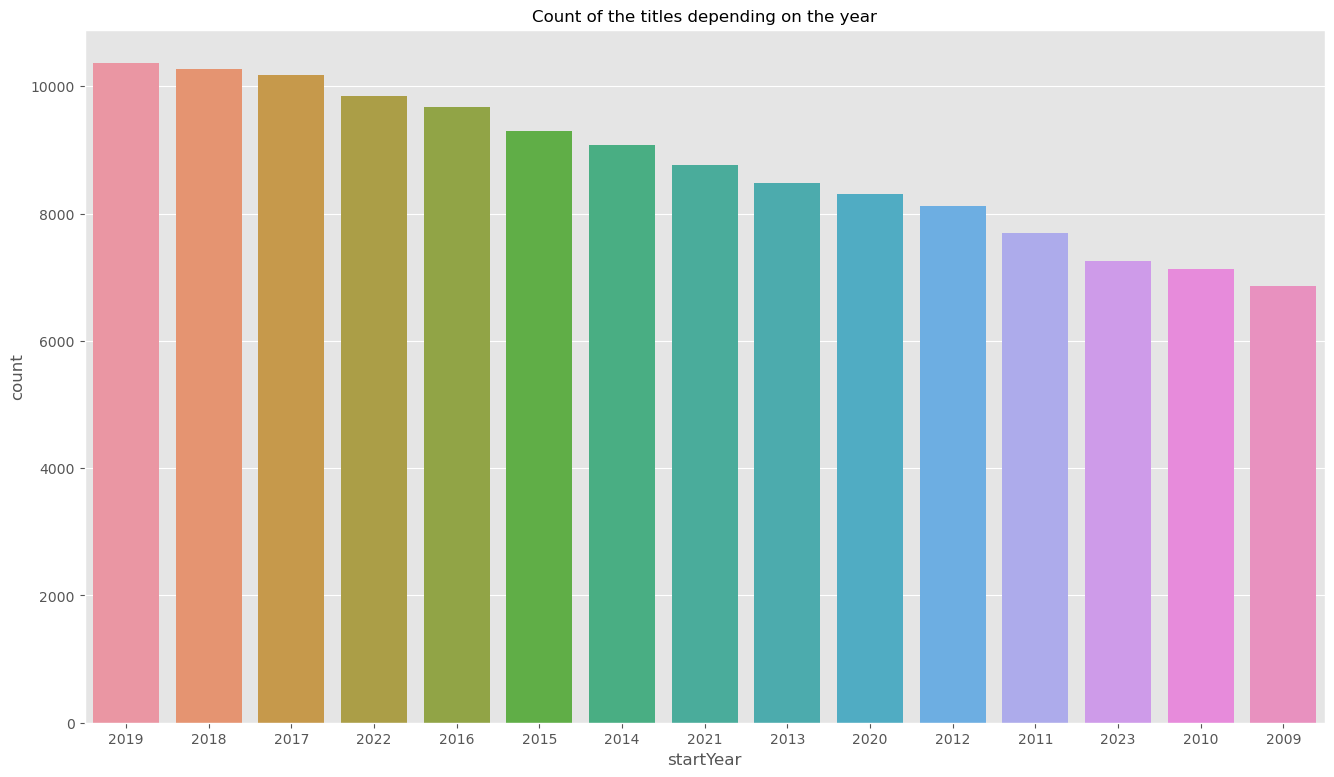

In [8]:
#@title plotting start year
yearsCount = df['startYear'].value_counts()
orderedYears = yearsCount.index

plt.title('Count of the titles depending on the year', fontsize=12)
sns.countplot(x='startYear',data=df, order=orderedYears)

<Axes: title={'center': 'Count of the top titles depending on the genre'}, xlabel='genres', ylabel='count'>

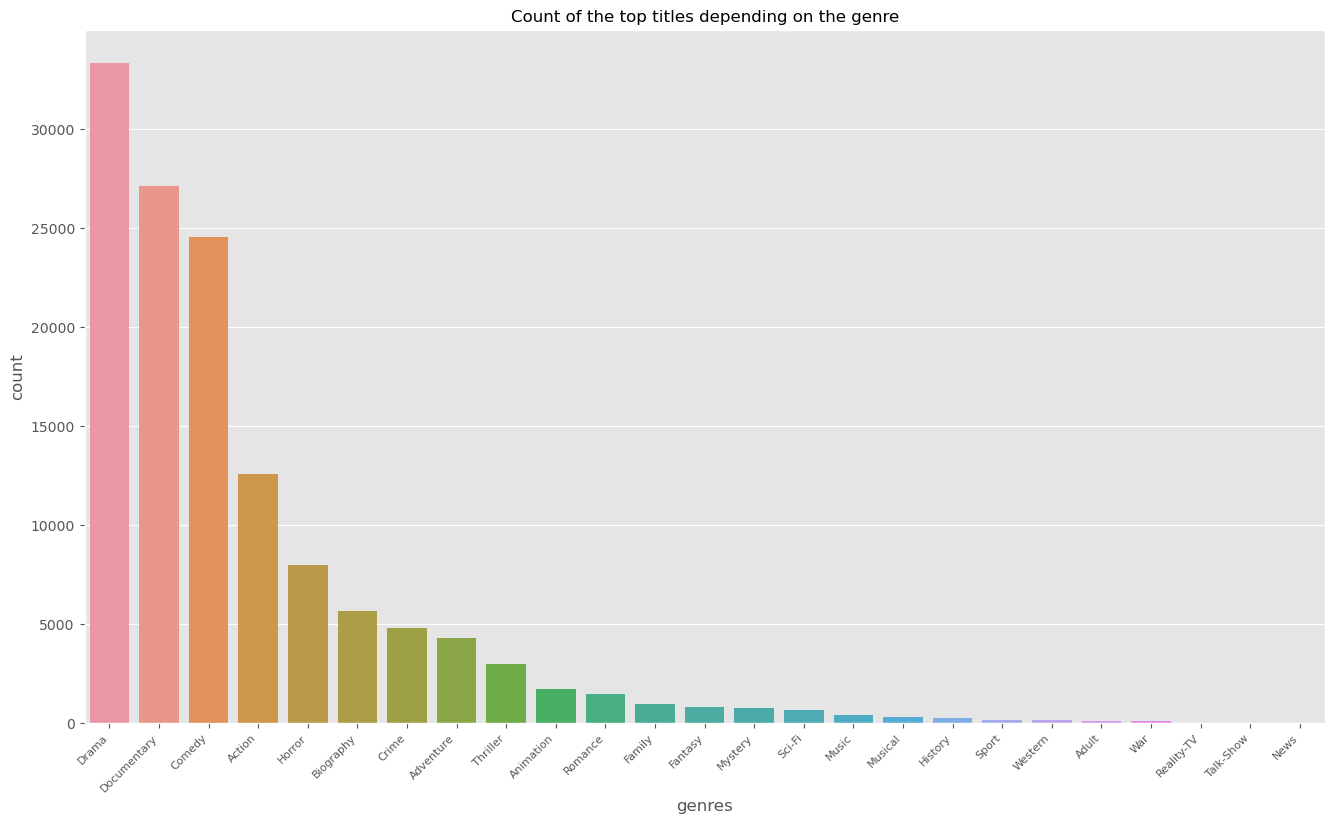

In [41]:
genresCount = df['genres'].value_counts()
orderedGenres = genresCount.index
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title('Count of the top titles depending on the genre', fontsize=12)

sns.countplot(x='genres',data=df ,order=orderedGenres)

<Axes: title={'center': 'Count of the titles depending on the year'}, xlabel='averageRating', ylabel='count'>

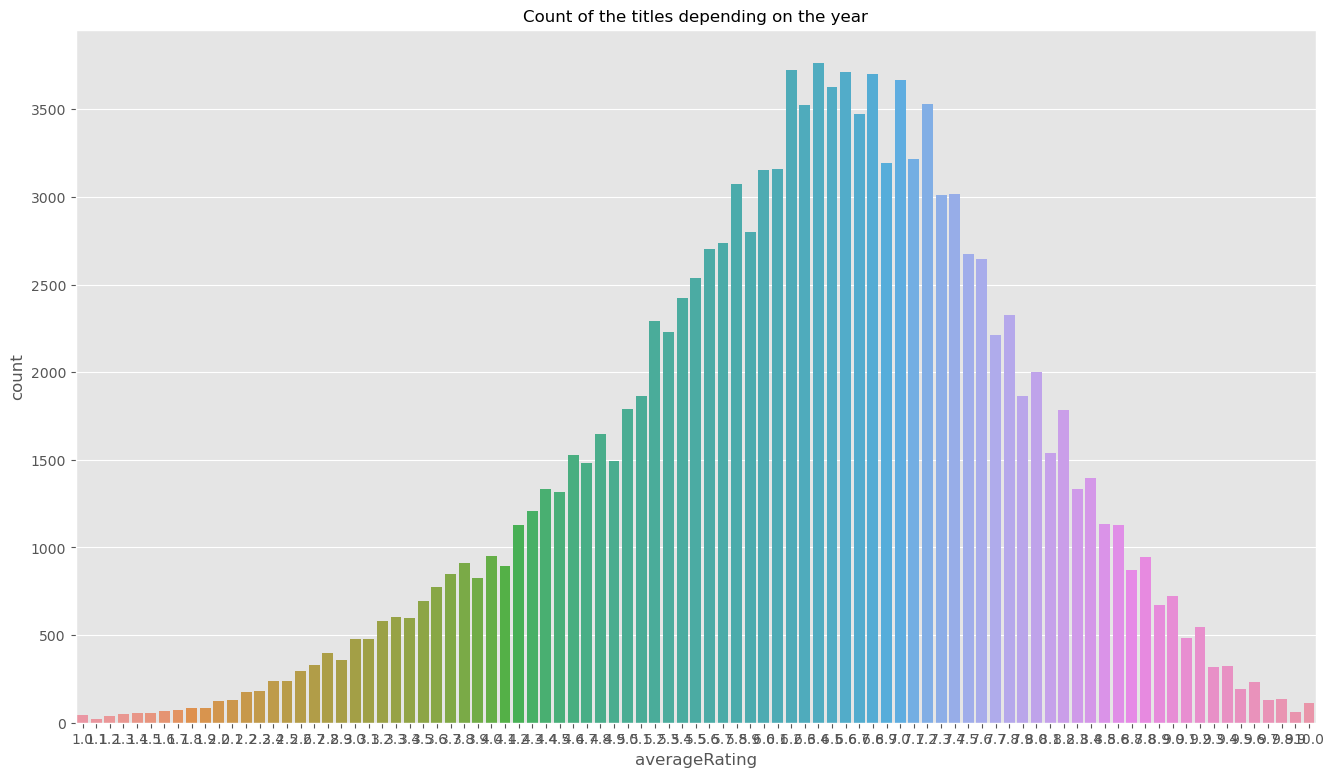

In [67]:
plt.title('Count of the titles depending on the year', fontsize=12)
sns.countplot(x='averageRating',data=df)

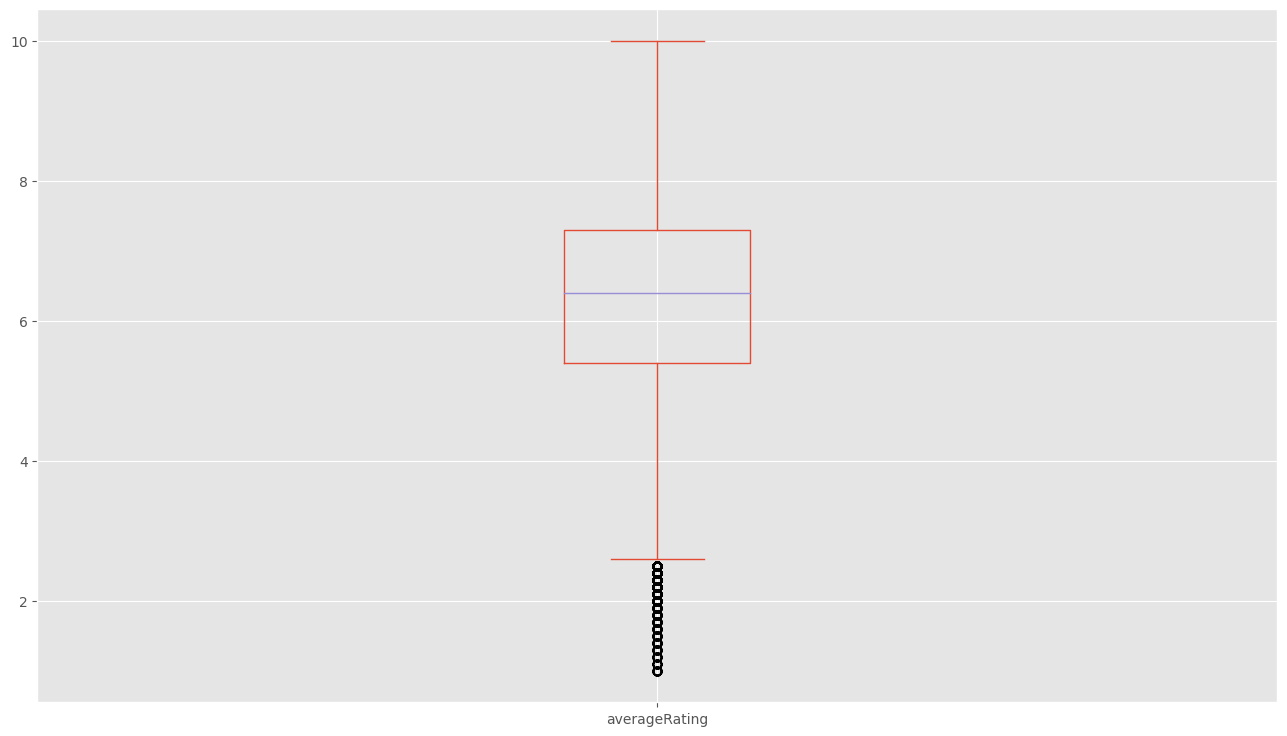

In [68]:
df['averageRating'].plot(kind="box");
print("The rankings less than 2.5 are outliers")

We erase the outliers


<Axes: xlabel='averageRating', ylabel='count'>

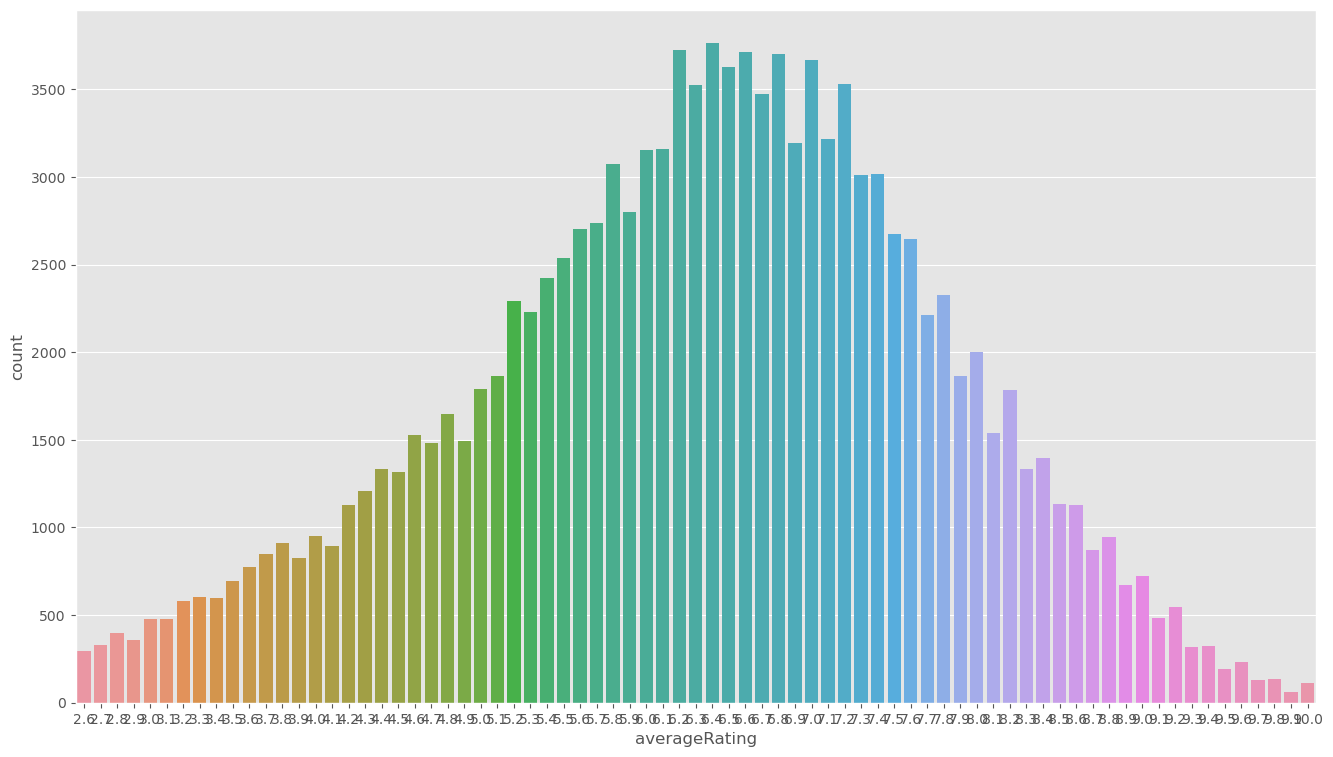

In [71]:
#@title we get rid of the outliers on the rating
print("We erase the outliers")
df = df[df['averageRating'] > 2.5]
sns.countplot(x='averageRating',data=df)

In [46]:
########################################## DESICION TREE ##########################################

In [106]:
#Independant variables: genres, startYear, isAdult, titleType, 
x = df[['genres', 'startYear', 'isAdult', 'numVotes']].values

print("original data: " )
print(x)


original data: 
[['Documentary' '2021' '0' 62]
 ['Drama' '2020' '0' 183]
 ['Drama' '2018' '0' 7888]
 ...
 ['Adventure' '2019' '0' 17]
 ['Drama' '2019' '0' 7]
 ['Drama' '2017' '0' 11]]


In [100]:
#Making the columns numbers for the processing of the tree
#genre preprocessing
genre = preprocessing.LabelEncoder()
genre.fit(["Drama", "Documentary", "Comedy", "Action", "Horror", "Biography", 
                    "Crime", "Adventure", "Thriller", "Animation", "Romance"])
x[:,0] = genre.transform(x[:,0])
#year preprocessing
year = preprocessing.LabelEncoder()
year.fit(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
          '2022', '2023' ])
x[:,1] = year.transform(x[:,1])
#adult preprocessing
adult = preprocessing.LabelEncoder()
adult.fit(['0', '1'])
x[:,2] = adult.transform(x[:,2])


print("New data: ")
print(x)

New data: 
[[6 12 0 62]
 [7 11 0 183]
 [7 9 0 7888]
 ...
 [1 10 0 17]
 [7 10 0 7]
 [7 8 0 11]]


In [101]:
#Dependant variable: averageRating
y = df['averageRating'].astype('object')
#y preprocessing
rating = preprocessing.LabelEncoder()
rating.fit(['2.6', '2.7', '2.8', '2.9', 
            '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', 
            '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', 
            '5.0', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', 
            '6.0', '6.1', '6.2', '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', 
            '7.0', '7.1', '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', 
            '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', 
            '9.0', '9.1', '9.2', '9.3', '9.4', '9.5', '9.6', '9.7', '9.8', '9.9', 
            '10.0' ])

y = rating.transform(y)

print(y)

[43 39 42 ... 10 61 51]


In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 10000)

print("Train data: " , x_train.shape, y_train.shape)
print("Test data: " , x_test.shape, y_test.shape)

Train data:  (87423, 4) (87423,)
Test data:  (37467, 4) (37467,)


In [111]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth= 10)
tree.fit(x_train, y_train)

treePred = tree.predict(x_test)

print("Prediction: ", treePred[0:5])
print("Actual result: ", y_test[0:5])

Prediction:  [47 33 30 42 37]
Actual result:  [31 33 41 30 31]


In [112]:
print("Accuracy of the tree: ", metrics.accuracy_score(y_test, treePred))

Accuracy of the tree:  0.03760642698908373


In [62]:
######################################### RANDOM FOREST ##################################################################


In [63]:
forest = RandomForestClassifier(n_estimators=100,
                                criterion="gini",
                                max_features="sqrt",
                                bootstrap=True,
                                oob_score=True)

forest.fit(x_train, y_train)
print(forest.score(x_test, y_test))
print(forest.oob_score_)

0.03421572500987752
0.03440879636946558


The data in the csv isn't useful at all to predict the rating the movie will have

the models desicion tree and random forest aren't the best models for this case
